### The dataset
The data source for this multiple linear regression is Kaggle: https://www.kaggle.com/datasets/ashydv/housing-dataset. The original dataset has been modified by removing 107 outliers. While this may seem like a significant percent of the dataset, I have done so to ensure that the model better fits the data. This practice may not be ideal in a coprorate or academic research setting, but seeing that this is a personal project, I find it fit to do so. If you are interested in the process of anomoly removal you can visit the code file titled 'MLR_dataset_anomoly_removal'. <br>
The housing dataset used in this code file has 13 variables, including one target variable, price, and 12 predictors. 

#### Metadata
In this section I will mention the variable name and a brief description:
1. price     - The price of the house
2. area      - The square footage of the house
3. bedrooms  - The number of bedrooms in the house
4. bathrooms - The number of bathrooms in the house
5. stories   - The number of floors in the house
6. mainroad  - Whether the house is accesible by a mainroad or not
7. guestroom - Whether the house has a guest room or not
8. basement  - Whether the house has a basement or not
9. hotwaterheating - Whether the house has water heating or not
10. airconditioning - Whether the house has air conditioning or not
11. parking  - The number of parking spots included with the house
12. prefarea - Whether the house is located in a preferred neighborhood or not
13. furnishingstatus - Whether the house is furnished, semifurnished, or unfurnished

In [3]:
# Importing necessary libraries for loading the data, feature engineering, and visualizations. 
# I will import more libraries as and when they are necessary
import pandas as pd  
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np   

# Ignore all warnings
import warnings
warnings.filterwarnings("ignore")  

In [4]:
# Reading the csv file
housing_data = pd.read_csv('Housing_cleaned.csv')

# How many rows and columns are in the dataset?
housing_data.shape

(438, 13)

In [5]:
# Displaying the first five rows of the dataset
housing_data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,8043000,7482,3,2,3,yes,no,no,yes,no,1,yes,furnished
1,7875000,6550,3,1,2,yes,no,yes,no,yes,0,yes,furnished
2,7560000,6000,3,2,3,yes,no,no,no,yes,0,no,semi-furnished
3,7455000,4300,3,2,2,yes,no,yes,no,no,1,no,unfurnished
4,7420000,7440,3,2,1,yes,yes,yes,no,yes,0,yes,semi-furnished


### Feature Engineering

Linear regression models can't understand text. Looking at the data, we see some categorical variables. A categorical variable is a type of variable that represents categories or labels rather than numerical values. In order for the regression to interpret these values, they need to be replaced by numbers.   <br>
For yes/ no questions we use binary values where 1 indicates yes and 0 indicates no. This is called **binary encoding**. In the last feature 'furnishingstatus' we see three unique values in the column: furnished, semi-furnished, and unfurnished. We don't want to assign numbers to each value in this categorical feature for 3 reasons: <br>
1. The variable has more than two unique values (multiclass categorical variables).
2. The categories are not in a ranking system (e.g. good, better, best)
3. We want to prevent the model from interpreting numeric labels as meaningful rankings. <br>

Therefore, we employ a method called **One-hot encoding**. One-hot encoding builds a column for each unique value in the categorical variable and assigns 1s or 0s for True or False.

In [6]:
# One-hot encoding
mlrdf = pd.get_dummies(housing_data, columns=['furnishingstatus'], dtype=int)

# Binary encoding
mlrdf['mainroad'] = housing_data['mainroad'].map({'yes': 1, 'no': 0})
mlrdf['guestroom'] = housing_data['guestroom'].map({'yes': 1, 'no': 0})
mlrdf['basement'] = housing_data['basement'].map({'yes': 1, 'no': 0})
mlrdf['hotwaterheating'] = housing_data['hotwaterheating'].map({'yes': 1, 'no': 0})
mlrdf['airconditioning'] = housing_data['airconditioning'].map({'yes': 1, 'no': 0})
mlrdf['prefarea'] = housing_data['prefarea'].map({'yes': 1, 'no': 0})
mlrdf.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,8043000,7482,3,2,3,1,0,0,1,0,1,1,1,0,0
1,7875000,6550,3,1,2,1,0,1,0,1,0,1,1,0,0
2,7560000,6000,3,2,3,1,0,0,0,1,0,0,0,1,0
3,7455000,4300,3,2,2,1,0,1,0,0,1,0,0,0,1
4,7420000,7440,3,2,1,1,1,1,0,1,0,1,0,1,0


### Visualizing Data points, the line of best fit, and residuals

In [7]:
# Looking at the summary statistics of the dataset
mlrdf.describe()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
count,4.380000e+02,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000
mean,4.215870e+06,4584.899543,2.840183,1.198630,1.618721,0.833333,0.159817,0.353881,0.043379,0.255708,0.543379,0.214612,0.223744,0.422374,0.353881
std,1.275725e+06,1589.194522,0.653827,0.421719,0.633407,0.373104,0.366856,0.478720,0.203942,0.436757,0.763402,0.411022,0.417229,0.494502,0.478720
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.290000e+06,3460.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.060000e+06,4100.000000,3.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.996250e+06,5850.000000,3.000000,1.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,8.043000e+06,9000.000000,4.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000


Text(0.5, 1.0, 'Scatter Plot of Area vs Price')

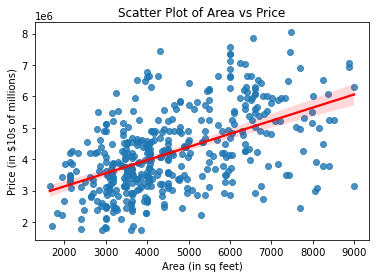

In [8]:
# Plotting data points on a scatterplot and adding a line of best fit
fig2 = sns.regplot(data=mlrdf, x= "area", y="price", line_kws={'color': 'red'})

# Add axis labels and a title to the graph
plt.xlabel("Area (in sq feet)")
plt.ylabel("Price (in $10s of millions)")
plt.title("Scatter Plot of Area vs Price")

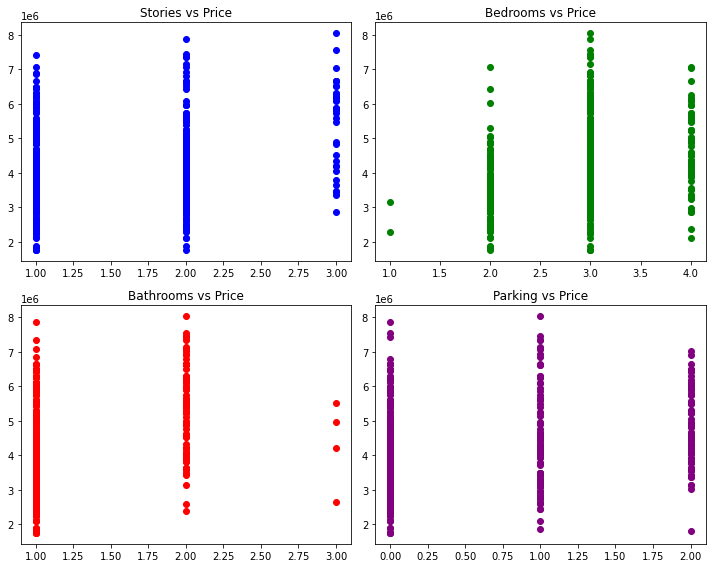

In [9]:
# Create a 2x2 subplot grid to accomodate 4 scatter plots
fig, axes = plt.subplots(2, 2, figsize=(10, 8))  # 2 rows, 2 columns

# Scatter Plot 1 - bedrooms v price 
axes[0, 1].scatter(mlrdf["bedrooms"], mlrdf["price"], color="g")
axes[0, 1].set_title("Bedrooms vs Price")

# Scatter Plot 2 - bathrooms v price 
axes[1, 0].scatter(mlrdf["bathrooms"], mlrdf["price"], color="r")
axes[1, 0].set_title("Bathrooms vs Price")

# Scatter Plot 3 - stories v price 
axes[0, 0].scatter(mlrdf["stories"], mlrdf["price"], color="b")
axes[0, 0].set_title("Stories vs Price")

# Scatter Plot 4 - parking v price 
axes[1, 1].scatter(mlrdf["parking"], mlrdf["price"], color="purple")
axes[1, 1].set_title("Parking vs Price")

# Adjust layout
plt.tight_layout()
plt.show()

Looking at the scatterplots above, a clear trend in the variables cannot be found. Therefore we need to use a different type of visualization to better understand these predictors. <br>
**Box plots** can be helpful in better understanding binary variables, especially against the regressand. There are two boxes, each visualizing datapoints that have 0 or 1 values in the specified predictor column. The box indicates all values of between the 25th percentile (lower boundary) and the 75th percentile (upper boundary), with the median value depicted by the line inside the blue box within the 0 or 1 subcategory. The vertical line on the bottom extends until the minimum value observed, and the line on the top extends until the maximum value observed within the subcategories. Sometimes datapoints may appear outside of these plots, indicating outliers. 

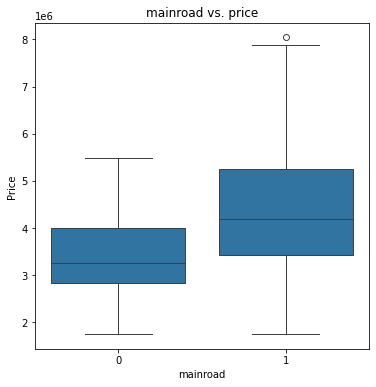

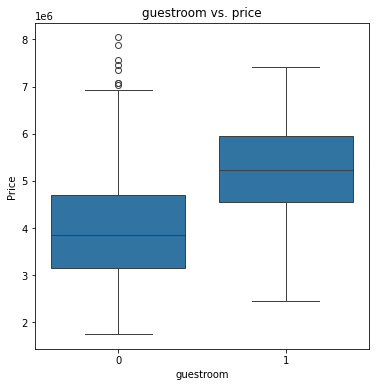

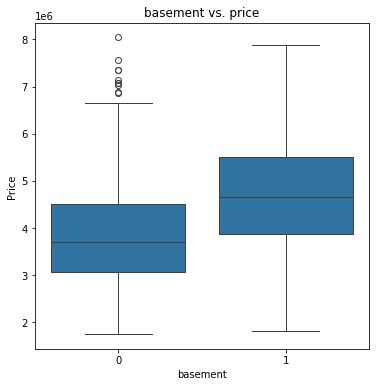

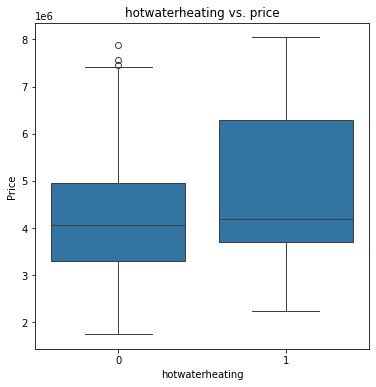

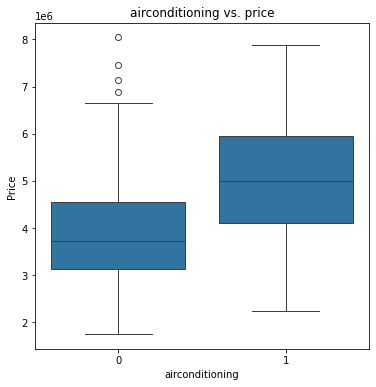

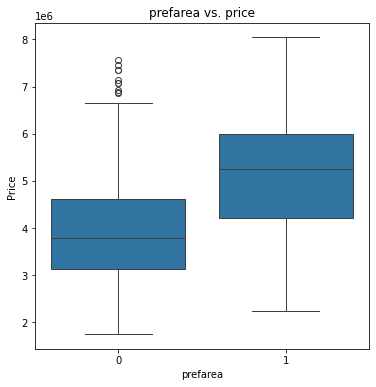

In [10]:
# Plotting binary variables against price on a boxplot
binary_vars = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

for var in binary_vars:
    plt.figure(figsize=(6, 6))
    sns.boxplot(x=var, y='price', data=mlrdf)
    plt.title(f'{var} vs. price')
    plt.xlabel(var)
    plt.ylabel('Price')
    plt.show()

Another way to visualize binary variables is by building a **Violin plot**. Violin plots also capture the distribution of datapoints at a value. The plot captures the minimum and maximum points at its ends. The line within the violin plot indicate 25th and 75th percentiles, with the white mark indicating the mediam value. 

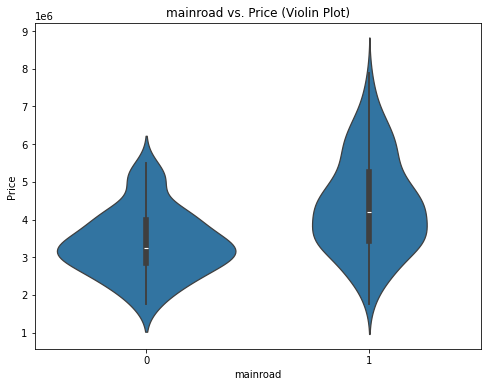

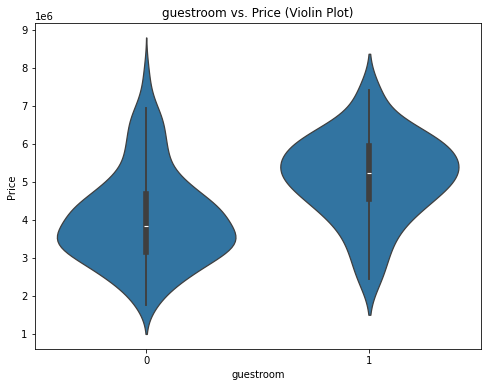

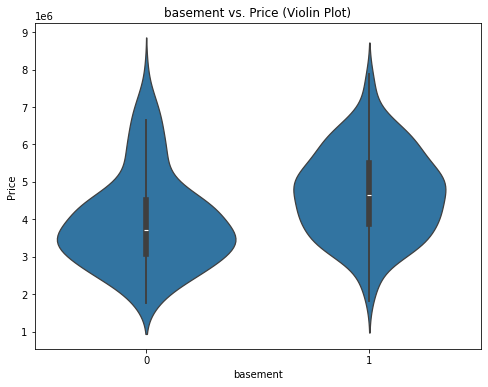

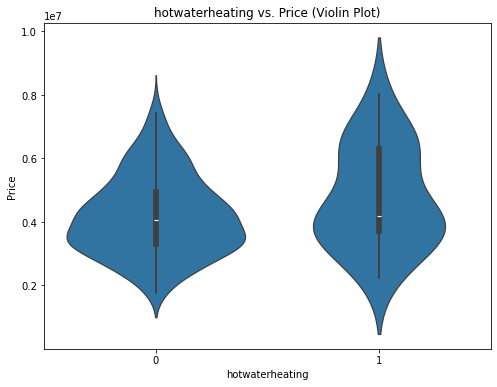

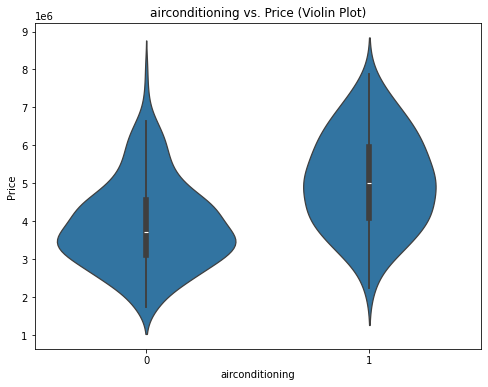

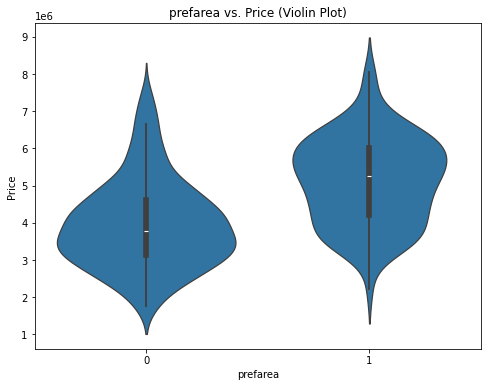

In [11]:
# Plotting binary variables against price on a Violin Plots
for var in binary_vars:
    plt.figure(figsize=(8, 6))
    sns.violinplot(x=var, y='price', data=mlrdf)
    plt.title(f'{var} vs. Price (Violin Plot)')
    plt.xlabel(var)
    plt.ylabel('Price')
    plt.show()

One way to visually check for multicollinearity (assumption 5) is by building a 
**Correlation matrix**. Correlation matrices offer insights into the measure of correlation between 2 variables in a dataset. You can use the legend on the right of the matrix to better interpret the values

#### Correlation Matrix

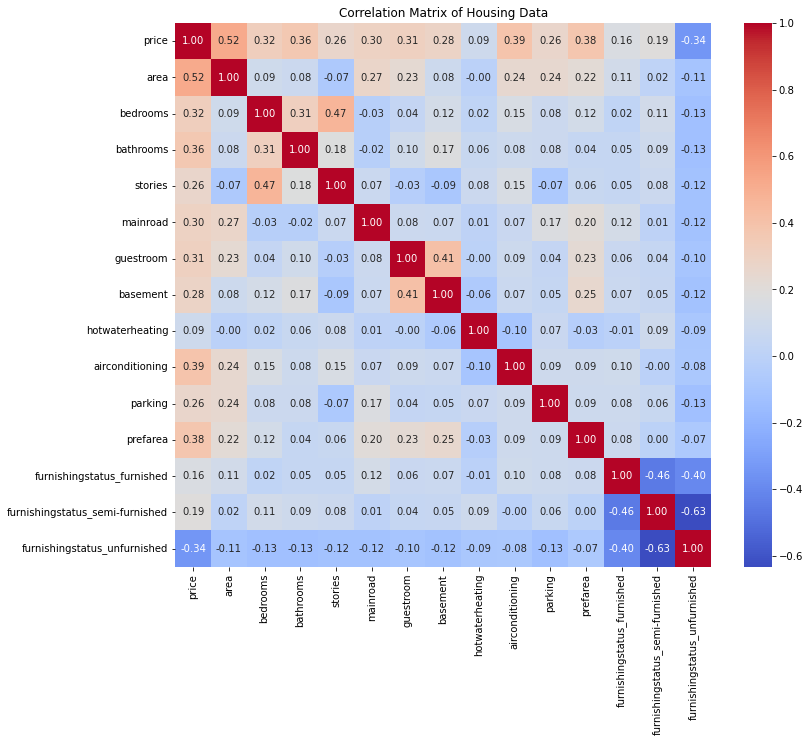

In [12]:
# Calculate the correlation matrix for Assumption5. Multicollinearity
correlation_matrix = mlrdf.corr()

# Plot the correlation matrix using seaborn
plt.figure(figsize=(12, 10))  # Adjust figure size for better readability
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f") 
plt.title('Correlation Matrix of Housing Data')
plt.show()

From the above correlation matrix, it seems that the *furnishingstatus_semi-furnished* variable is highly correlated with furnishingstatus_unfurnished variable. To avoid multicollinearity, I will remove variable furnishingstatus_semi-furnished from the dataet. 

In [13]:
mlrdf = mlrdf.drop(columns=['furnishingstatus_semi-furnished'])

### Building the Model

In [14]:
from sklearn.model_selection import train_test_split
# Define independent (X) and dependent (y) variables
X = mlrdf[['area', 'bedrooms', 'bathrooms','stories','mainroad','guestroom','basement','hotwaterheating',
        'airconditioning','parking','prefarea','furnishingstatus_furnished','furnishingstatus_unfurnished']] 
y = mlrdf['price']
y = y.to_numpy().reshape(-1, 1)

# Split into Training and Testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

The dataset is to be split into 2 subsets. 80% of the dataset will be used for training the model, and 20% of the dataset will be used to test and evaluate the model’s performance. We do this because to evaluate a model's performance, we need to compare the actual y values to the predicted y values. We couldn't just generate random square footage data because once we make a prediction, how can we test how close those values are to the actual price?

#### Using SciKit Learn

In [15]:
from sklearn.linear_model import LinearRegression
# Train the model on training data
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In these two steps, we have defined the 'model' to be a linear regression model, and we have train the model using the training datasets X_train, y_train. The fit funtion takes in 2 arguments; the X values and the Y values.

In [16]:
# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Get coefficients
print("Intercept:", round(model.intercept_[0],2))
print("Coefficients:", model.coef_[0][0:5])

Intercept: 1049586.17
Coefficients: [2.60299306e+02 6.74124273e+04 5.88362244e+05 3.12283203e+05
 2.79611071e+05]


This section is calculating the β0 (y-intercept) and the other β coefficient values from the model and printing them.

#### Coded Manually

In [18]:
# Building a design matrix X by adding a column of 1s at the start of the feature matrix
def beta_vector(X,y):
    design_m = np.c_[np.ones(X.shape[0]), X]  
    # Initializing the target vector
    target_v = y

    # Calculate coefficients: (X^T X)^-1 X^T y
    # Find the dot product of X and X transposed (also known as the Gramian/ Gram matrix), 
    XtX = design_m.T @ design_m

    # Calculating its multiplicative inverse [(X^T X)^-1](1)
    XtX_inv = np.linalg.pinv(XtX)

    # Finding the dot product of the transposed feature matrix and the target vector (2), and then finding the 
    # dot product of (1) and (2) [(X^T X)^-1] @ [X^T y]
    coeff = XtX_inv @ (design_m.T @ target_v)
    
    return coeff

betas = beta_vector(X_train, y_train)
# Printing the results
print("Intercept:", round(betas[0][0],2))
print("Coefficients:", betas[1:6])

Intercept: 1049586.17
Coefficients: [[2.60299306e+02]
 [6.74124273e+04]
 [5.88362244e+05]
 [3.12283203e+05]
 [2.79611071e+05]]


Manually coding the function takes a few more steps, but enforces the math we studied in the article. Here, I have defined a function *beta_vector* to calculate the coefficients and y-intercept.

In [19]:
# Let's check to see if there is a difference between the values calculated using the scikit library,
# and those calculated manually.
# scikit list
coef_list = model.coef_.flatten().tolist()
coef_list.insert(0,model.intercept_[0])

# manual list
betas_list = betas.flatten().tolist()

# Make a dataframe to compare values
ddf = pd.DataFrame({"scikit list": coef_list, "manual list": betas_list})

#calculating the absolute difference between each corresponding value
total_abs_diff = sum(abs(a - b) for a, b in zip(coef_list, betas_list))  

# show values
print(total_abs_diff)
ddf.head()

0.00011426906678480009


,scikit list,manual list
0,1.049586e+06,1.049586e+06
1,2.602993e+02,2.602993e+02
2,6.741243e+04,6.741243e+04
3,5.883622e+05,5.883622e+05
4,3.122832e+05,3.122832e+05


The above dataframe proves that we are comparing like values from each calculation method. The difference between the two values is so negligible that even if the difference were to be rounded to the third decimal value, it would be 0. Those are *almost* the same values!

### Prediction

#### Using SciKit Learn

In [20]:
# Predictions
y_pred = model.predict(X_test)
y_pred[0:5]

array([[3422443.35689796],
       [4813598.16387325],
       [3536014.41940565],
       [2913348.97425201],
       [2770338.88533244]])

We used model.fit to train the model, now we are using model.predict to get the model's predictions of house prices based on the predictor values in X_test. I am only outputting the first five predictions so you can see them.

#### Manually Coded

In [22]:
# Calculating predictions
# Building a design matrix X by adding a column of 1s at the start of the test feature matrix
X_matrix_test = np.c_[np.ones(X_test.shape[0]), X_test] 

# Using the Xβ expression to calculate predictions, which is the dot product of the feature matrix and the 
# β vector
y_pred_m = X_matrix_test @ betas
y_pred_m[0:5]

array([[3422443.35690344],
       [4813598.16387316],
       [3536014.41941777],
       [2913348.97425563],
       [2770338.88534575]])

I am using the Y = Xβ formula to manually calculate the predictions of this model. I am using the output of the *beta_vector* function as my β vector.

### Model Evaluation

#### Using SciKit Learn 

In [23]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
#Calculate Evaluation Metrics:
#Mean absolute error
mae = mean_absolute_error(y_test, y_pred)
#Mean square error
mse = mean_squared_error(y_test, y_pred)
#Root mean square error
rmse = np.sqrt(mse)
#R-square score
r2 = r2_score(y_test, y_pred)

# Print Results
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.4f}")

Mean Absolute Error (MAE): 568421.76
Mean Squared Error (MSE): 556516442268.94
Root Mean Squared Error (RMSE): 746000.30
R² Score: 0.7290


Scikit learn also has in-built functions for evaluations. The Mean absolute error, mean squared error, and R-squared score can be calculated using their corresponding functions. Root mean squared error is calculated by taking the square root of MSE, which is also one line of code.

#### Manually Coded

In [24]:
#Calculating MAE
def mae(ytest, ypred):
    total_res = 0
    for i in range(len(ytest)):
#Calculating the absolute residual for each observation (|y actual - y predicted|)
        residual = np.abs(ytest[i] - ypred[i])
#Summing up all the residuals
        total_res += residual
#Calculating the average absolute residuals by dividing the total absolute residuals by the the no. of obs.
    mae_score = total_res/len(ytest)
    return mae_score
mmae = mae(y_test, y_pred_m)


#Calculating MSE
def mse(ytest, ypred): 
    total_res = 0
    for i in range(len(ytest)):
#Calculating the residual for each observation (y actual - y predicted)
        residual = ytest[i] - ypred[i]
#Calculating the square of the residual for each observation
        total_res += residual**2
#Calculating the average squared residuals by dividing the total absolute residuals by the the no. of obs.
    mse_score = total_res/len(ytest)
    return mse_score
mmse = mse(y_test, y_pred_m)

#Calculating RMSE
def rmse(ytest, ypred): 
    total_res = 0
    for i in range(len(ytest)):
#Calculating the residual for each observation (y actual - y predicted)
        residual = ytest[i] - ypred[i]
#Calculating the square of the residual for each observation
        total_res += residual**2
#Calculating the average squared residuals by dividing the total absolute residuals by the the no. of obs
    mse_score = total_res/len(ytest)
#Calculating the square root of the MSE score
    rmse_score = mse_score**0.5
    return rmse_score
mrsme = rmse(y_test, y_pred_m)

#Calculating R Squared
def Rsq(ytest, ypred):
#Calculating SSR (the numerator of the SSR formula)
    SSR = 0
    for i in range(len(ytest)):
#Calculating the residual for each observation (y actual - y predicted)
        residual = ytest[i] - ypred[i]
#According to the SSR formula, SSR is the residual squared 
        SSR += residual**2
#Calculating the mean of the actual Y values for SST
    Y_mean = np.mean(ytest)
    SST = 0
    for i in range(len(ytest)):
#Calculating the variance in the actual Y values (subtracting the mean from each y obs)
        var = ytest[i] - Y_mean
#According to the SST formula, SST is the variance squared 
        SST += var**2
#Finally, we apply the R-squared formula using SSR and SST. The explained variance ratio is subtracted from 1.
    rsquared = 1 - (SSR/SST)
    
    return rsquared
mr2 = Rsq(y_test, y_pred_m)


# Print Results
print(f"Mean Absolute Error (MAE): {mmae[0]:.2f}")
print(f"Mean Squared Error (MSE): {mmse[0]:.2f}")
print(f"Root Mean Squared Error (RMSE): {mrsme[0]:.2f}")
print(f"R² Score: {mr2[0]:.4f}")

Mean Absolute Error (MAE): 568421.76
Mean Squared Error (MSE): 556516442272.81
Root Mean Squared Error (RMSE): 746000.30
R² Score: 0.7290


### Histogram of residuals

In [25]:
#Calculating Residuals, and adding it to a new dataframe
resdf = mlrdf[['price', 'area']]
allpred = model.predict(X)
residuals = y - allpred
residuals = residuals.flatten()
resdf['residuals'] = residuals
resdf.head()

,price,area,residuals
0,8043000,7482,1.636264e+06
1,7875000,6550,2.032828e+06
2,7560000,6000,1.692107e+06
3,7455000,4300,3.014629e+06
4,7420000,7440,6.090642e+05


To see the distribution of the residuals, let's calculate them first. If you look closely, you'll notice that these residuals are slightly different from the ones that we've been using. The difference is that we had been looking at the residuals between the y actual and y predicted values of the test set. Now we are calculating the residuals for ALL observations in the dataset.

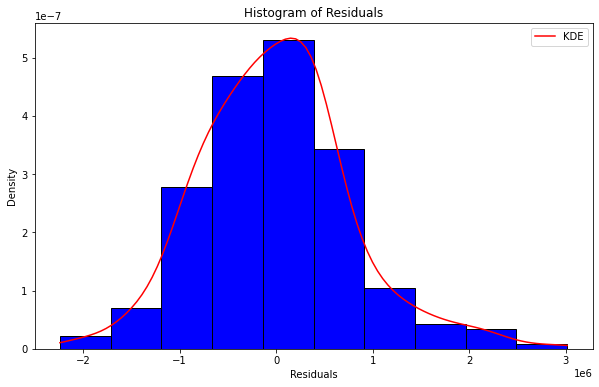

In [26]:
# Plot histogram of residuals using matplotlib
#Inititalizing the size of the plot
plt.figure(figsize=(10, 6))
#Telling the hist function which variable we want to plot, how many bins we want, and the colors
plt.hist(residuals, bins=10, color='blue', edgecolor='black', density=True)

# KDE line (manual alternative)
from scipy.stats import gaussian_kde
#Using the Python scipy statistics library, we are drawing a distribution line based on the histogram
kde = gaussian_kde(residuals)
x = np.linspace(min(residuals), max(residuals), 100)
plt.plot(x, kde(x), color='red', label='KDE')

plt.xlabel("Residuals")
plt.ylabel("Density")
plt.title("Histogram of Residuals")
plt.legend()
plt.show()